In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from scipy.stats import skew
from sklearn.preprocessing import power_transform
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import pickle
import numpy as np
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn .model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.compose import make_column_transformer

In [2]:
df=pd.read_csv("C:/Users/91954/Downloads/Telecom_customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.isnull().sum()#checking null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
print(df.apply(lambda col: col.unique()))

customerID          [7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC...
gender                                                 [Female, Male]
SeniorCitizen                                                  [0, 1]
Partner                                                     [Yes, No]
Dependents                                                  [No, Yes]
tenure              [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...
PhoneService                                                [No, Yes]
MultipleLines                             [No phone service, No, Yes]
InternetService                                [DSL, Fiber optic, No]
OnlineSecurity                         [No, Yes, No internet service]
OnlineBackup                           [Yes, No, No internet service]
DeviceProtection                       [No, Yes, No internet service]
TechSupport                            [No, Yes, No internet service]
StreamingTV                            [No, Yes, No internet service]
StreamingMovies     

In [7]:
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [8]:
#droping id column
df=df.drop(columns=['customerID'])

In [9]:
df.dtypes# we can see total charges  as object we need to convert it

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
df.loc[df['TotalCharges']==' ']#we can see that total charges has blank spaces

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
#as we can see some blank spaces we will drop those columns

In [12]:
df.shape

(7043, 20)

In [13]:
df=df[df.TotalCharges!=' ']
df.shape

(7032, 20)

In [14]:
df.loc[df['TotalCharges']==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [15]:
df.TotalCharges=pd.to_numeric(df.TotalCharges)

In [16]:
df.replace('No phone service', 'No',inplace=True)
df.replace('No internet service', 'No',inplace=True)

In [17]:
df.MultipleLines.unique()# we can see that no can replace this values in this type of columns

array(['No', 'Yes'], dtype=object)

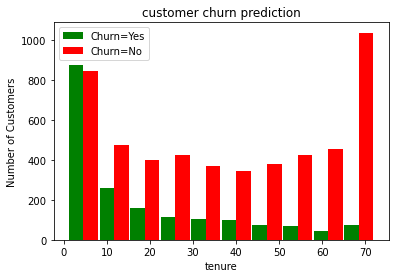

In [18]:
tenure_churn_no=df[df.Churn=='No'].tenure
tenure_churn_yes=df[df.Churn=='Yes'].tenure
plt.xlabel('tenure')
plt.ylabel('Number of Customers')
plt.title('customer churn prediction')

plt.hist([tenure_churn_yes,tenure_churn_no],rwidth=0.95,color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [19]:
#we can see that the customer who have been there for 70 or more are mor than 1000 and is the most in this plot

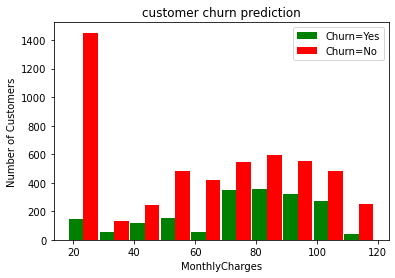

In [20]:
mc_churn_no=df[df.Churn=='No'].MonthlyCharges
mc_churn_yes=df[df.Churn=='Yes'].MonthlyCharges
plt.xlabel('MonthlyCharges')
plt.ylabel('Number of Customers')
plt.title('customer churn prediction')

plt.hist([mc_churn_yes,mc_churn_no],rwidth=0.95,color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [21]:
#we can see that the company doesnt have a good time as the lower charges and higher charges both type of customer are bleaving so much

In [22]:
print(df.apply(lambda col: col.unique()))

gender                                                 [Female, Male]
SeniorCitizen                                                  [0, 1]
Partner                                                     [Yes, No]
Dependents                                                  [No, Yes]
tenure              [1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...
PhoneService                                                [No, Yes]
MultipleLines                                               [No, Yes]
InternetService                                [DSL, Fiber optic, No]
OnlineSecurity                                              [No, Yes]
OnlineBackup                                                [Yes, No]
DeviceProtection                                            [No, Yes]
TechSupport                                                 [No, Yes]
StreamingTV                                                 [No, Yes]
StreamingMovies                                             [No, Yes]
Contract            

Encoding Techniques

In [23]:
df=pd.get_dummies(data=df,columns=['InternetService','Contract','PaymentMethod'])
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [24]:
df.dtypes

gender                                      object
SeniorCitizen                                int64
Partner                                     object
Dependents                                  object
tenure                                       int64
PhoneService                                object
MultipleLines                               object
OnlineSecurity                              object
OnlineBackup                                object
DeviceProtection                            object
TechSupport                                 object
StreamingTV                                 object
StreamingMovies                             object
PaperlessBilling                            object
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                       object
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [25]:
en=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=en.fit_transform(df[i].values.reshape(-1,1))
    

C:\Users\91954\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [26]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [27]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.008883,-0.016328,-0.013093,-0.000807,...,0.007584,-0.011189,0.004745,-0.003251,0.007755,-0.003603,-0.015973,0.001632,0.000844,0.013199
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.142996,-0.038576,0.066663,0.059514,...,-0.108276,0.254923,-0.182519,0.137752,-0.046491,-0.116205,-0.016235,-0.024359,0.171322,-0.152987
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142561,0.143346,0.141849,0.153556,...,-0.001043,0.001235,-0.000286,-0.280202,0.083067,0.247334,0.111406,0.082327,-0.083207,-0.096948
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024307,0.080786,0.023639,0.013900,...,0.051593,-0.164101,0.138383,-0.229715,0.069222,0.201699,0.052369,0.061134,-0.149274,0.056448
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.332399,0.328297,0.361138,0.361520,...,0.013786,0.017930,-0.037529,-0.649346,0.202338,0.563801,0.243822,0.232800,-0.210197,-0.232181
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.279530,-0.091676,-0.052133,-0.070076,...,-0.452255,0.290183,0.171817,-0.001243,-0.003142,0.004442,0.008271,-0.006916,0.002747,-0.004463
MultipleLines,-0.008883,0.142996,0.142561,-0.024307,0.332399,0.279530,1.000000,0.098592,0.202228,0.201733,...,-0.200318,0.366420,-0.210794,-0.088558,-0.003594,0.106618,0.075429,0.060319,0.083583,-0.227672
OnlineSecurity,-0.016328,-0.038576,0.143346,0.080786,0.328297,-0.091676,0.098592,1.000000,0.283285,0.274875,...,0.320343,-0.030506,-0.332799,-0.246844,0.100658,0.191698,0.094366,0.115473,-0.112295,-0.079918
OnlineBackup,-0.013093,0.066663,0.141849,0.023639,0.361138,-0.052133,0.202228,0.283285,1.000000,0.303058,...,0.156765,0.165940,-0.380990,-0.164393,0.084113,0.111391,0.086942,0.090455,-0.000364,-0.174075
DeviceProtection,-0.000807,0.059514,0.153556,0.013900,0.361520,-0.070076,0.201733,0.274875,0.303058,1.000000,...,0.145150,0.176356,-0.380151,-0.225988,0.102911,0.165248,0.083047,0.111252,-0.003308,-0.187325


<AxesSubplot:>

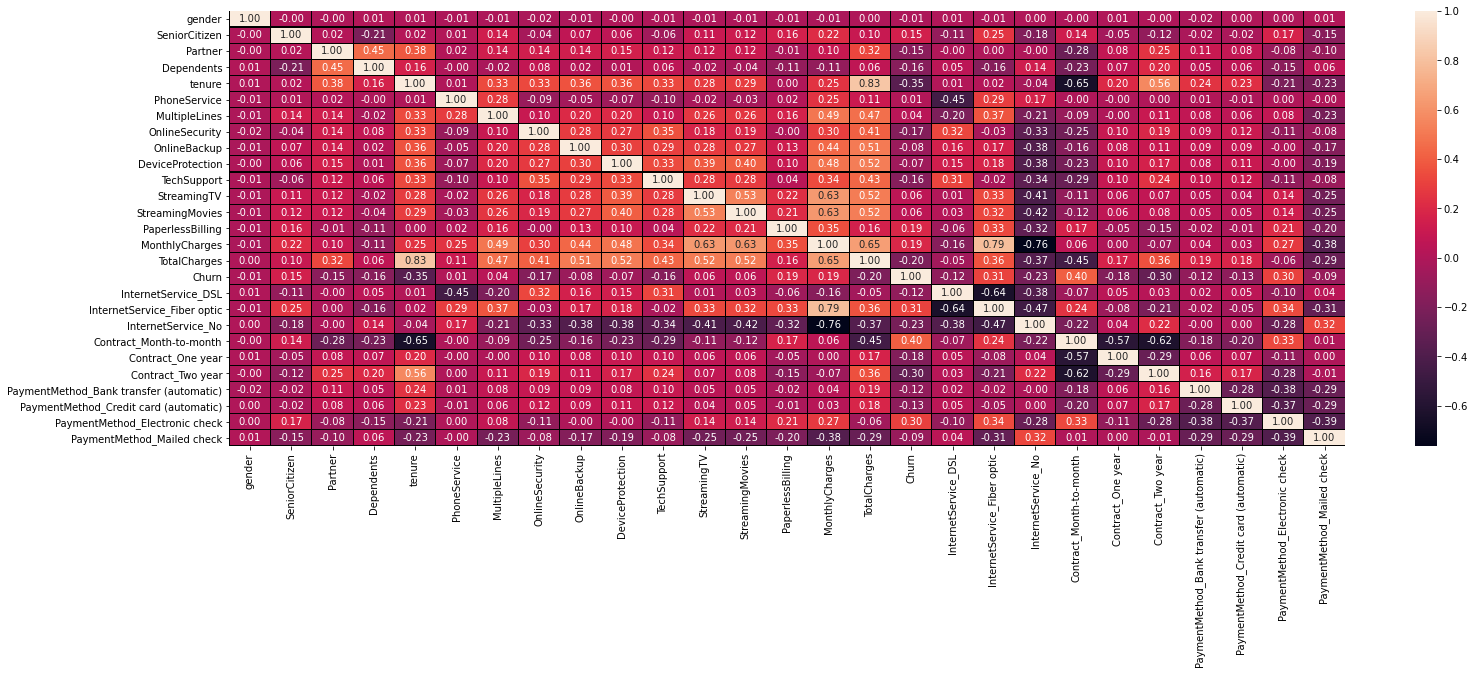

In [28]:
plt.figure(figsize=(25,8),facecolor='white')
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

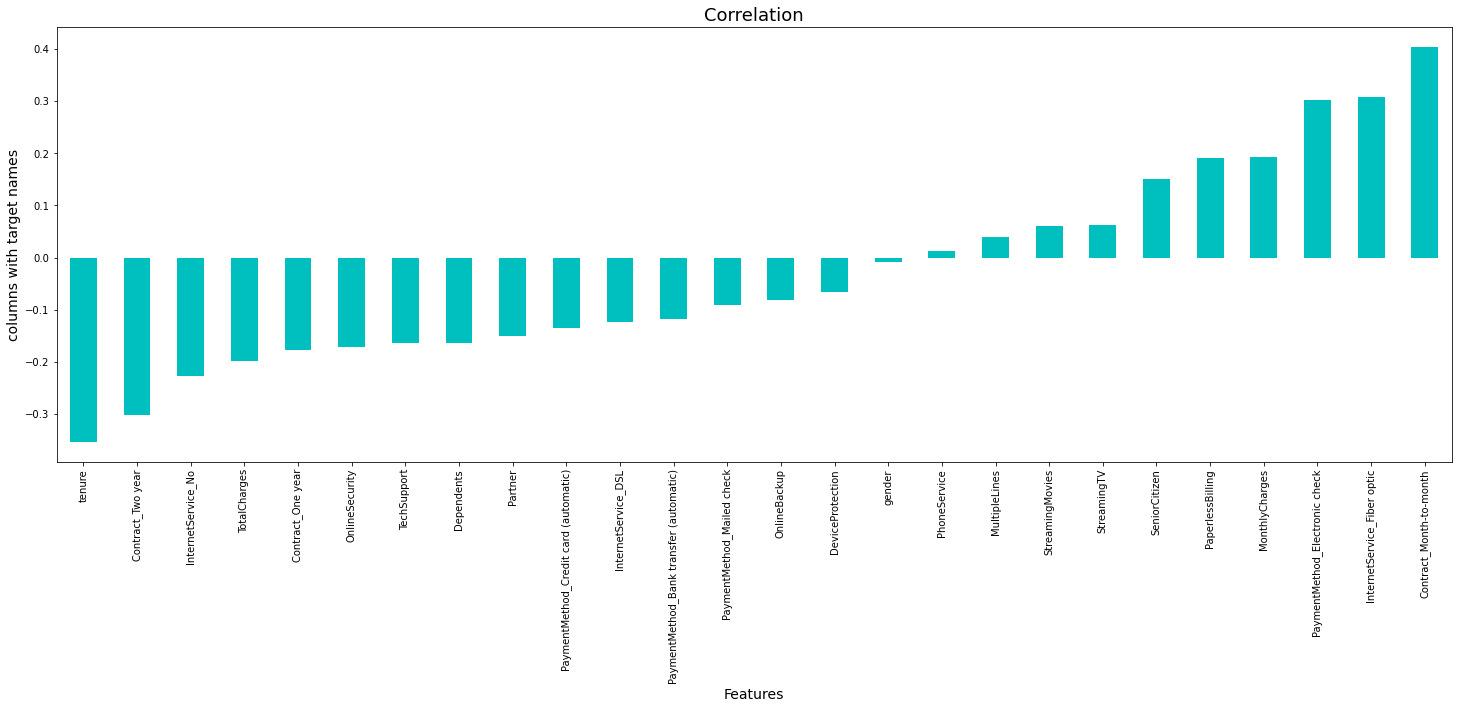

In [29]:
plt.figure(figsize=(25,8))
df.corr()['Churn'].sort_values(ascending=True).drop(['Churn']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

In [30]:
#as we can analysis that the tenure is negatively related to churn and has very good positive relatoon with total charges

In [31]:
#we will not perform skewness or outlierr technique as most of the columns are object type

In [32]:
x=df.drop("Churn",axis=1)
y=df['Churn']

In [33]:
sc=StandardScaler()# standerdizing the data
x=sc.fit_transform(x)
x

array([[-1.00943013, -0.44032709,  1.03561683, ..., -0.5253508 ,
         1.40476387, -0.54360352],
       [ 0.99065797, -0.44032709, -0.9656081 , ..., -0.5253508 ,
        -0.71186341,  1.83957601],
       [ 0.99065797, -0.44032709, -0.9656081 , ..., -0.5253508 ,
        -0.71186341,  1.83957601],
       ...,
       [-1.00943013, -0.44032709,  1.03561683, ..., -0.5253508 ,
         1.40476387, -0.54360352],
       [ 0.99065797,  2.27103902,  1.03561683, ..., -0.5253508 ,
        -0.71186341,  1.83957601],
       [ 0.99065797, -0.44032709, -0.9656081 , ..., -0.5253508 ,
        -0.71186341, -0.54360352]])

In [34]:
lr=LogisticRegression()
for i in range(0,1000):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.4,random_state=i)
    lr.fit(X_train,Y_train)
    pred_train=lr.predict(X_train)
    pred_test=lr.predict(X_test)
    print(f"At random state{i},the training accuracy is :- {accuracy_score(Y_train,pred_train)}")
    print(f"At random state{i},the testing  accuracy is :- {accuracy_score(Y_test,pred_test)}")
    print('\n')

At random state0,the training accuracy is :- 0.8054041242000474
At random state0,the testing  accuracy is :- 0.8048346960540348


At random state1,the training accuracy is :- 0.8106186300071107
At random state1,the testing  accuracy is :- 0.794169925346605


At random state2,the training accuracy is :- 0.8087224460772695
At random state2,the testing  accuracy is :- 0.7980803412726626


At random state3,the training accuracy is :- 0.8042190092438967
At random state3,the testing  accuracy is :- 0.8062566654816922


At random state4,the training accuracy is :- 0.8082484000948092
At random state4,the testing  accuracy is :- 0.8051901884109491


At random state5,the training accuracy is :- 0.8125148139369519
At random state5,the testing  accuracy is :- 0.7899040170636331


At random state6,the training accuracy is :- 0.8001896183929841
At random state6,the testing  accuracy is :- 0.8151439744045503


At random state7,the training accuracy is :- 0.803033894287746
At random state7,the testing

In [36]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.4,random_state=13)

In [37]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [38]:
pred_test=lr.predict(X_test)
print(accuracy_score(Y_test,pred_test))

0.8098115890508354


In [39]:
Train_accuracy=accuracy_score(Y_train,pred_train)
Test_accuracy=accuracy_score(Y_test,pred_test)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is {Test_accuracy}")
    print('\n')
    

At cross fold 2 the cv score is 0.8013367463026166 and accuracy score for training is 0.6259777198388243 and accuracy score for testing is 0.8098115890508354


At cross fold 3 the cv score is 0.8037542662116041 and accuracy score for training is 0.6259777198388243 and accuracy score for testing is 0.8098115890508354


At cross fold 4 the cv score is 0.8043230944254836 and accuracy score for training is 0.6259777198388243 and accuracy score for testing is 0.8098115890508354


At cross fold 5 the cv score is 0.803610882793915 and accuracy score for training is 0.6259777198388243 and accuracy score for testing is 0.8098115890508354


At cross fold 6 the cv score is 0.8024744027303754 and accuracy score for training is 0.6259777198388243 and accuracy score for testing is 0.8098115890508354


At cross fold 7 the cv score is 0.8031875341561967 and accuracy score for training is 0.6259777198388243 and accuracy score for testing is 0.8098115890508354


At cross fold 8 the cv score is 0.8040386

In [40]:
#as the cv score  impacted the training accuracy  we are taking cv =6

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.4,random_state=i)
parameters={'n_neighbors':[1,2,3,4,5],'algorithm':[ 'kd_tree', 'brute','ball_tree'],'leaf_size':[10,15,20,25,30,35]}
kn=KNeighborsClassifier()
clf=GridSearchCV(kn,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_neighbors': 4}


In [43]:
kn= KNeighborsClassifier(n_neighbors=4,algorithm='kd_tree',leaf_size=10)
kn.fit(X_train,Y_train)
kn.score(X_train,Y_train)
pred_decision=kn.predict(X_test)
knn=accuracy_score(Y_test,pred_decision)
print('accuracy_score:',knn*100)
knscore=cross_val_score(kn,x,y,cv=6)
knc=knscore.mean()
print('cross_val_score:',knc*100)

accuracy_score: 77.17739068610024
cross_val_score: 76.47895335608646


In [44]:
y_pred_kn = kn.predict(X_test)
print("KNeighborsClassifier report: \n\n", classification_report(Y_test, y_pred_kn))

KNeighborsClassifier report: 

               precision    recall  f1-score   support

           0       0.81      0.91      0.85      2070
           1       0.61      0.39      0.47       743

    accuracy                           0.77      2813
   macro avg       0.71      0.65      0.66      2813
weighted avg       0.75      0.77      0.75      2813



In [45]:
from sklearn.ensemble import RandomForestClassifier
parameters={'criterion':['gini','entropy'],'max_features':['auto','sqrt','log2']}
rf=RandomForestClassifier()
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'criterion': 'entropy', 'max_features': 'log2'}


In [47]:
rf=RandomForestClassifier(criterion='entropy',max_features='log2')
rf.fit(X_train,Y_train)
rf.score(X_train,Y_train)
pred_decision=rf.predict(X_test)
rfs=accuracy_score(Y_test,pred_decision)
print('accuracy_score:',rfs*100)
rfscore=cross_val_score(rf,x,y,cv=6)
rfc=rfscore.mean()
print('cross_val_score:',rfc*100)

accuracy_score: 79.27479559189477
cross_val_score: 78.86803185437998


In [48]:
y_pred_rf = rf.predict(X_test)
print("KNeighborsClassifier report: \n\n", classification_report(Y_test, y_pred_rf))

KNeighborsClassifier report: 

               precision    recall  f1-score   support

           0       0.83      0.90      0.87      2070
           1       0.64      0.48      0.55       743

    accuracy                           0.79      2813
   macro avg       0.74      0.69      0.71      2813
weighted avg       0.78      0.79      0.78      2813



In [49]:
from sklearn.tree import DecisionTreeClassifier


parameters={'criterion':["gini", "entropy"],'splitter':['best','random'],'max_features':["auto", "sqrt", "log2"]}
                                                                                                                 
dt=DecisionTreeClassifier()
clf=GridSearchCV(dt,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'criterion': 'gini', 'max_features': 'auto', 'splitter': 'best'}


In [50]:
dt=DecisionTreeClassifier(criterion='entropy',max_features='auto',splitter='best')
dt.fit(X_train,Y_train)
dt.score(X_train,Y_train)
pred_decision=dt.predict(X_test)
dts=accuracy_score(Y_test,pred_decision)
print('accuracy_score:',dts*100)
dtscore=cross_val_score(dt,x,y,cv=6)
dtc=dtscore.mean()
print('cross_val_score:',dtc*100)

accuracy_score: 73.76466405972272
cross_val_score: 72.90955631399318


In [51]:
y_pred_dt = dt.predict(X_test)
print("DecisionTreeClassifier report: \n\n", classification_report(Y_test, y_pred_dt))

DecisionTreeClassifier report: 

               precision    recall  f1-score   support

           0       0.82      0.82      0.82      2070
           1       0.50      0.52      0.51       743

    accuracy                           0.74      2813
   macro avg       0.66      0.67      0.67      2813
weighted avg       0.74      0.74      0.74      2813



In [52]:
#as we can see logistic Regression is giving the best score

In [53]:
filename='telecomcustomerchurn.pkl'
pickle.dump(lr,open(filename,'wb'))

In [54]:
loaded_model=pickle.load(open('telecomcustomerchurn.pkl','rb'))
result=loaded_model.score(X_test,Y_test)
print(result)

0.8069676501955207


In [55]:
conclusion=pd.DataFrame([loaded_model.predict(X_test)[:],pred_decision[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,2803,2804,2805,2806,2807,2808,2809,2810,2811,2812
Predicted,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
Original,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,1


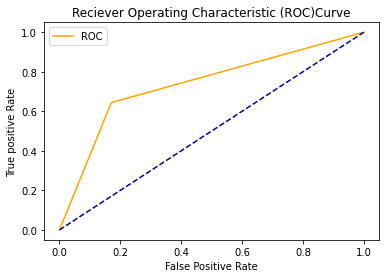

In [56]:
fpr,tpr,thresholds=roc_curve( y_pred_rf,Y_test)
roc_auc=auc(fpr,tpr)

plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True positive Rate')
plt.title('Reciever Operating Characteristic (ROC)Curve')
plt.legend()
plt.show()


In [57]:
#so this is the model